## TASK 1

`Descriptive Statistics`

`Basic Statistics`

In [12]:
import os

`Script Importing`

In [13]:
os.chdir('../scripts')
import data_processing as dp
import visualization as vis
import text_analysis as ta
import pandas as pd

In [14]:
data = dp.load_data('../datas/raw_analyst_ratings.csv')
print(dp.preprocess_data(data)['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


`Count the number of articles per publisher`

In [15]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


`Bar chart for Top Publisher`

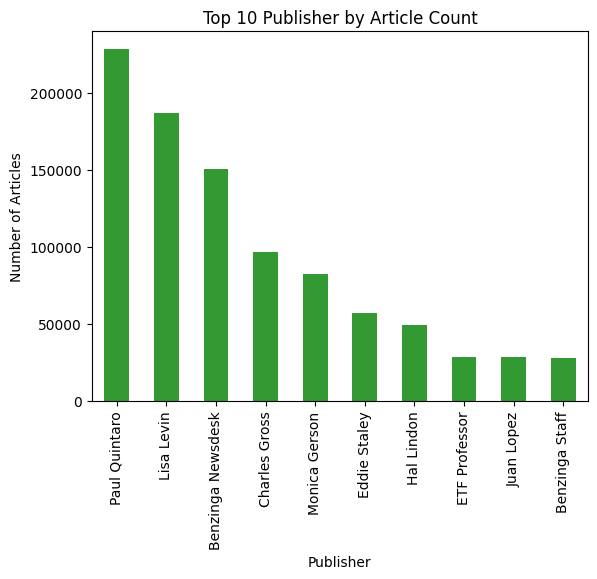

In [16]:
vis.barchart(publisher_counts, 10, "Top 10 Publisher by Article Count", "Publisher", "Number of Articles")

`Distribution of Publisher Contributions`

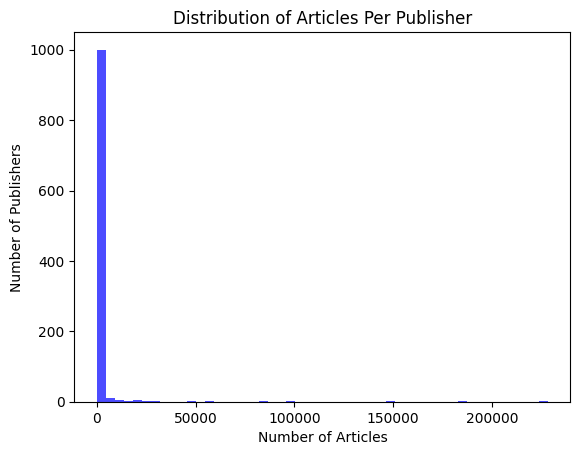

In [17]:
vis.plot_distribution(publisher_counts, bins=50, color='blue', title='Distribution of Articles Per Publisher', xlabel='Number of Articles', ylabel='Number of Publishers')

`See trends over time in publication`

In [18]:
day_counts = dp.preprocess_data(data)['day_of_week'].value_counts()
print(day_counts)

day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


`Bar chart for Day Counts`

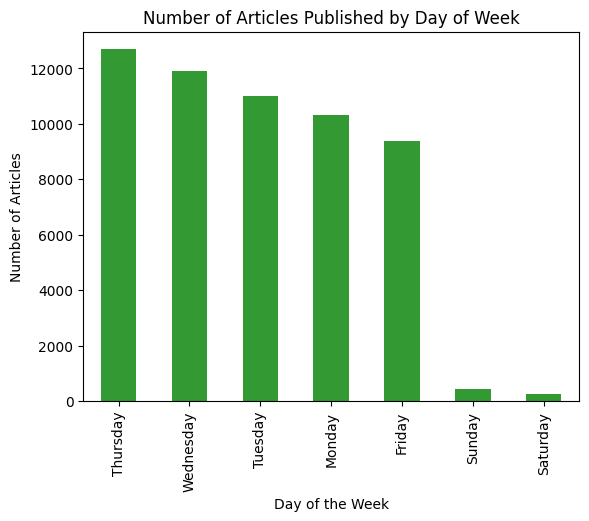

In [19]:
vis.barchart(day_counts, 7, "Number of Articles Published by Day of Week", "Day of the Week", "Number of Articles")

`Pie Chart for Proportions`

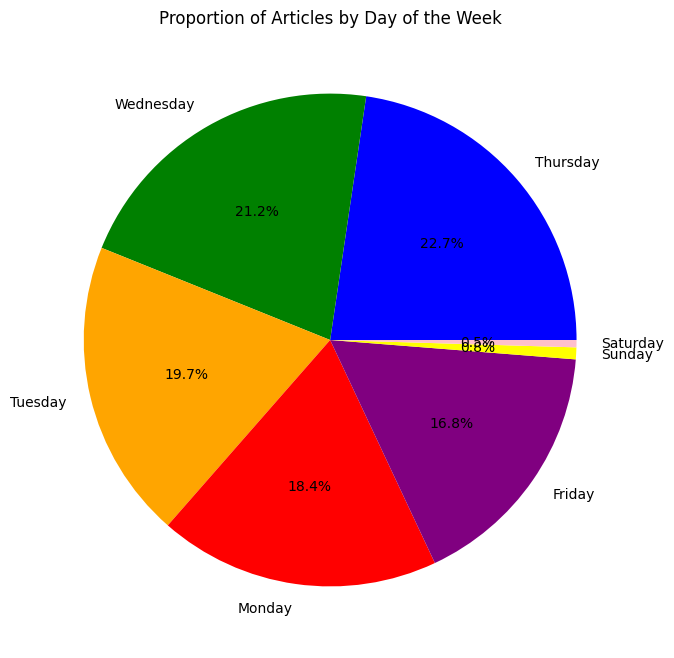

In [20]:
import matplotlib.pyplot as plt
day_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['blue', 'green', 'orange', 'red', 'purple', 'yellow', 'pink'])
plt.title('Proportion of Articles by Day of the Week')
plt.ylabel('')
plt.show()

`Text Analysis (Sentiment Analysis & Topic Modeling)`

In [21]:
sentiment_data = dp.analyze_sentiment(data)
sentiment_data['sentiment'].describe()

100%|██████████| 1408/1408 [04:15<00:00,  5.51it/s]


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'day_of_week', 'hour', 'sentiment'],
      dtype='object')


count    1.407328e+06
mean     6.650410e-02
std      2.714077e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64

`Histogram of Sentiment Scores`

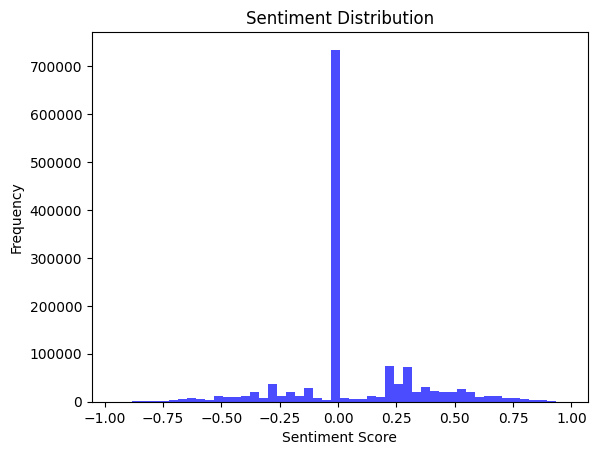

In [23]:
vis.plot_distribution(sentiment_data['sentiment'], 50, 'blue', 'Sentiment Distribution', 'Sentiment Score', 'Frequency')

`Identify Common Keywords or Phrases`

In [ ]:
common_words = ta.analyze_word_frequency(data)
common_words

,count
vs,162099
stocks,161776
est,140604
eps,128897
market,120558
shares,114313
reports,108710
update,91723
earnings,87399
sales,79645


`Bar Chart of Common Words`

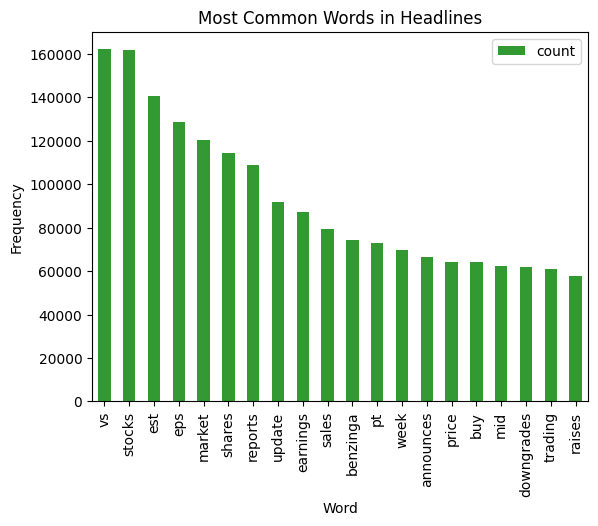

In [ ]:
vis.barchart(common_words, 20, 'Most Common Words in Headlines', 'Word', 'Frequency')

`Time Series Analysis`

`Publication frequency over time`

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
publication_frequency = data.set_index('date').resample('D').size()
print(publication_frequency)

date
2011-04-27 00:00:00-04:00      1
2011-04-28 00:00:00-04:00      2
2011-04-29 00:00:00-04:00      2
2011-04-30 00:00:00-04:00      1
2011-05-01 00:00:00-04:00      1
                            ... 
2020-06-07 00:00:00-04:00     25
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Length: 3334, dtype: int64


`Line Plot of Daily Publication Frequency`

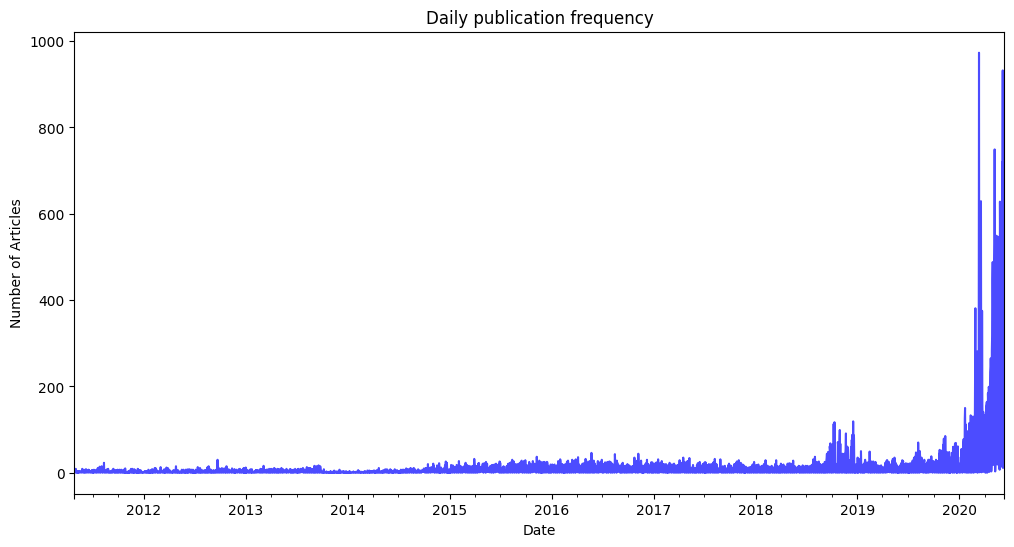

In [ ]:
plt.figure(figsize=(12,6))
publication_frequency.plot(color='blue', alpha=0.7)
plt.title('Daily publication frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

`Analysis of publishing times`

In [ ]:
hour_counts = data['hour'].value_counts().sort_index()
print(hour_counts)

hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


`Line Plot of Daily Publication Frequency`

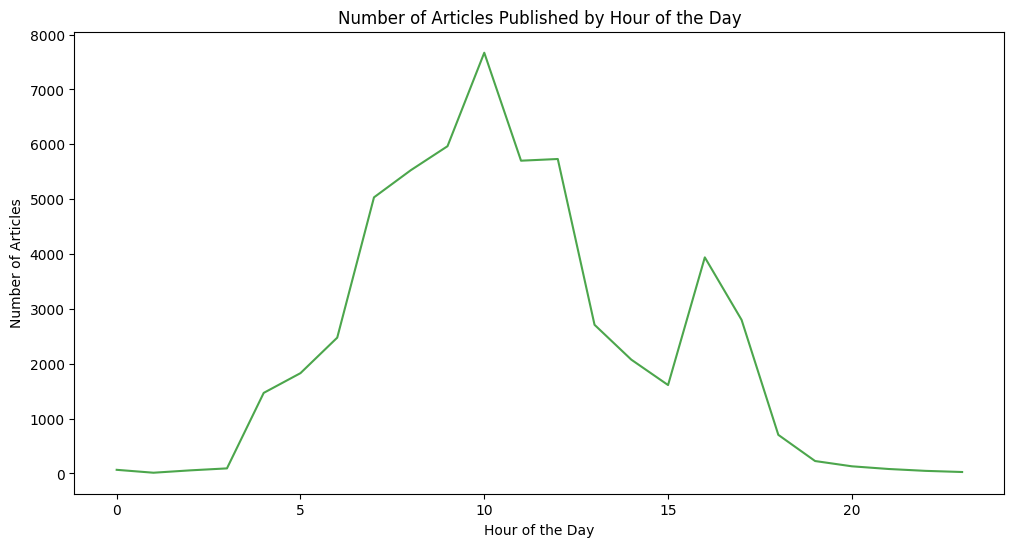

In [ ]:
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='line', color='green', alpha=0.7)
plt.title('Number of Articles Published by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

`Publisher Analysis`

In [ ]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


`Analyze the Type of News Reported by Different Publishers`

In [ ]:
publisher_sentiment = sentiment_data.groupby('publisher')['sentiment'].mean().sort_values(ascending=False)
print("Mean sentiment per publisher:")
print(publisher_sentiment)

Mean sentiment per publisher:
publisher
Happy Trading                     0.7650
Chris Fromhertz                   0.7579
janaviktoria                      0.7430
The Professor                     0.7269
dhiraj.surapaneni@benzinga.com    0.7096
                                   ...  
Gary Anderson                    -0.5719
parvgoel                         -0.5994
Melissa Brock                    -0.5994
Gino Bruno D'Alessio             -0.7832
Logan Mohtashami                 -0.7964
Name: sentiment, Length: 1034, dtype: float64


In [25]:
sentiment_data['domain'] = sentiment_data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

domain_counts = sentiment_data['domain'].value_counts()
print("Articles per domain:")
print(domain_counts)

Articles per domain:
domain
Paul Quintaro         228373
Lisa Levin            186979
Benzinga Newsdesk     150484
Charles Gross          96732
Monica Gerson          82380
                       ...  
Paul Dykewicz              1
Anthony Cibotti            1
DavidBDurandMD             1
Lydia Idem Finkley         1
David A. Moore             1
Name: count, Length: 1024, dtype: int64


`Bar chart for Articles per domain`

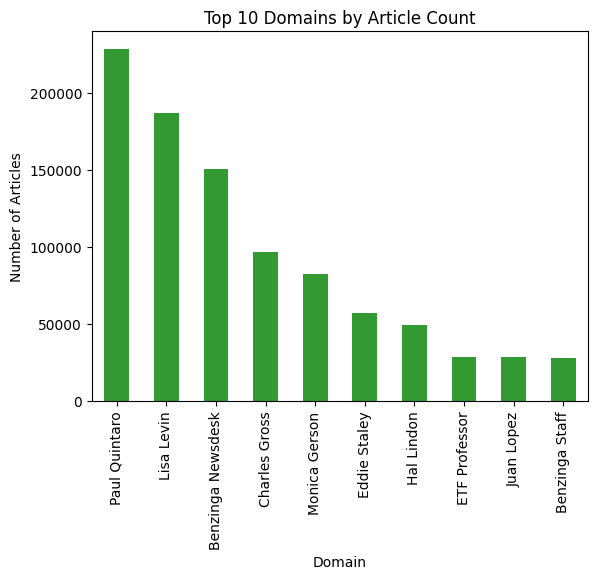

In [26]:
vis.barchart(domain_counts, 10, 'Top 10 Domains by Article Count', 'Domain', 'Number of Articles')